## Loading model and tokenizer

In [2]:
from keras.models import load_model

model_best = load_model('./lstm_model_20.hdf5')

import pickle

with open('./tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

len(tokenizer.word_index) + 1

25274

In [5]:
model_best.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7_input (InputLaye (None, 20)                0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 20, 128)           640000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 256)               263168    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 5000)              1285000   
Total params: 2,188,168
Trainable params: 2,188,168
Non-trainable params: 0
_________________________________________________________________


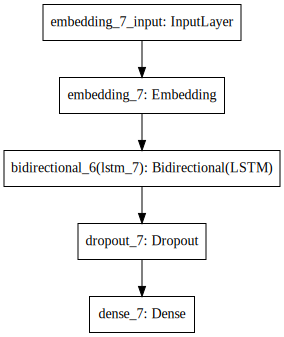

In [4]:
import pydot
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

plot_model(model_best, to_file='lstm2.png', show_shapes = True, show_layer_names = False)
SVG(model_to_dot(model_best).create(prog='dot', format='svg'))

## Generate sentences

In [43]:
# function for prediction next n words
import numpy as np

def pred_next_n(model, x_seq, output_len):
    """input model, seed sequence, length of the output sequence"""
    x_input = x_seq
    output_n = []
    for j in range(output_len):  
        x_seq = np.array(x_input).reshape(1, -1)
        predicted = model.predict_classes(x_seq, verbose=0)
        # print(predicted)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                output_n.append(output_word) 
                break
        x_input.append(index)
        x_input = x_input[1:]
    
    return(" ".join(output_n)) 

In [44]:
import random
import numpy as np

for i in range(10):
    seed_words = random.sample(range(5000), 20)
    pred_text = pred_next_n(model_best, seed_words, 30)
    print(pred_text)
    print()

roberts heaven fright , said harry runcorn undertone pince grubblyplank fright roberts grubblyplank 's sweetly roberts grubblyplank 's eyes . i 'm not going to be a bit of trouble

burkes , paces norris . he 's not going to be able to get rid of the dark arts , and he 's not going to be able to get

, and he had been a good view of the room , and he had been in the room , and he had been in the room , and he

kick at the end of the room , and he had been able to keep a few hours . he had been able to see the of the death eaters

than the runcorn precise moment the door was deserted . harry , ron , and hermione were standing in the middle of the room , and harry saw the of

. he vernon had duck , and he had been able to see the of the of the house , and he had been able to be a few hours

fright fright . he precise , said harry , his voice rising . he was still trying to see the of the crowd . he was still holding his wand

the time , he was n't going to get up to the castle , said herm